In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import arcsine

Funkcje potrzebne do zadania:

In [52]:
def generate_wieners(
    T: float, N: int, num_simulations: int
) -> tuple[np.ndarray, np.ndarray]:
    """
    Generate multiple trajectories of Wiener processes.

    Parameters:
    T (float): Total time.
    N (int): Number of time steps.
    num_simulations (int): Number of Wiener process simulations.

    Returns:
    tuple[np.ndarray, np.ndarray]: Time array, array of Wiener process trajectories.

    Example:
    --------
    >>> t_w, all_W = generate_wieners(T = 1, N = 1000, num_simulations = 50)
    This will generate 50 trajectories of Wiener processes with 1000 time steps each for a total time of 1.
    """
    dt = T / N
    t = np.linspace(0, T, N + 1)
    dW = np.sqrt(dt) * np.random.randn(num_simulations, N)
    W = np.cumsum(dW, axis=1)
    return t, np.insert(W, 0, 0, axis=1)

In [53]:
# pierwsze prawo
def time_above_zero(W: np.ndarray, t: np.ndarray) -> np.ndarray:
    """
    Calculate the total time the Wiener process spends above zero.

    Parameters:
    W (np.ndarray): Array of Wiener process realizations (num_simulations, N+1)
    t (np.ndarray): Time array (N+1)

    Returns:
    np.ndarray: Array of times spent above zero for each realization.

    Example:
    --------
    >>> T = 1
    >>> N = 1000
    >>> num_simulations = 1000
    >>> t_w, all_W = generate_continuous_wieners(T, N, num_simulations)
    >>> above_zero_times = time_above_zero(all_W, t_w)
    This will calculate the time spent above x-axis for each of the 1000 Wiener process realizations.
    """
    above_zero_segments = W > 0
    dt = np.diff(t)
    time_above_zero = np.sum(above_zero_segments[:, :-1] * dt, axis=1)
    return time_above_zero

In [54]:
# drugie prawo
def last_crossing_time(W: np.ndarray, t: np.ndarray) -> np.ndarray:
    """
    Calculate the last crossing time where Wiener process equals 0 for each simulation.

    Parameters:
    W (np.ndarray): Array of Wiener process trajectories.
    t (np.ndarray): Time array.

    Returns:
    np.ndarray: Array of last crossing times where Wiener process equals 0 for each simulation.
    Example:
    --------
    >>> T = 1
    >>> N = 1000
    >>> num_simulations = 1000
    >>> t_w, all_W = generate_continuous_wieners(T, N, num_simulations)
    >>> last_zero_times = last_crossing_time(all_W, t_w)
    This will calculate the last crossing time where Wiener process equals 0 for each simulation,
    where all_W is the array of Wiener process trajectories and t_w is the corresponding time array.
    """
    last_zero_times = np.zeros(len(W))

    for i, w in enumerate(W):
        sign_changes = np.where(np.diff(np.sign(w)) != 0)[0]

        if len(sign_changes) == 0:
            last_zero_times[i] = None
        else:
            last_zero_index = sign_changes[-1]
            last_zero_times[i] = np.interp(
                0,
                w[last_zero_index : last_zero_index + 2],
                t[last_zero_index : last_zero_index + 2],
            )

    return last_zero_times

Symulacja procesu Wienera

In [55]:
num_simulations = 1000
T = 1
steps = 1000
t_w, all_W = generate_wieners(T, steps, num_simulations)

Teoretyczna wartość PDF i CDF rozkładu arcsine

In [56]:
x = np.linspace(0, T, 100)
pdf = arcsine.pdf(x=x)
cdf = arcsine.cdf(x=x)

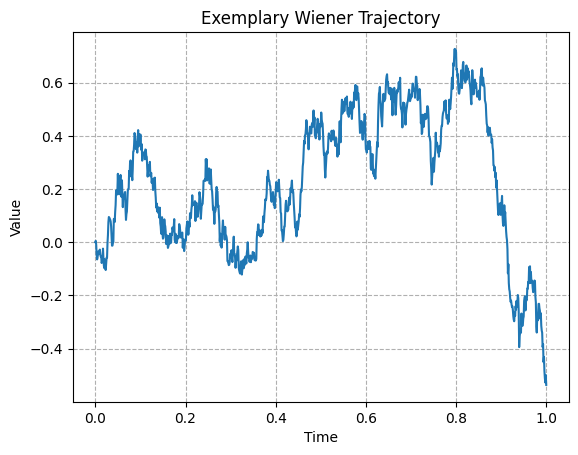

In [57]:
# Exemplary trajectory
plt.plot(t_w, all_W[0])
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Exemplary Wiener Trajectory")
plt.grid(True, linestyle="--")
plt.show()

Pierwsze prawo

In [58]:
above_zero_times = time_above_zero(all_W, t_w)

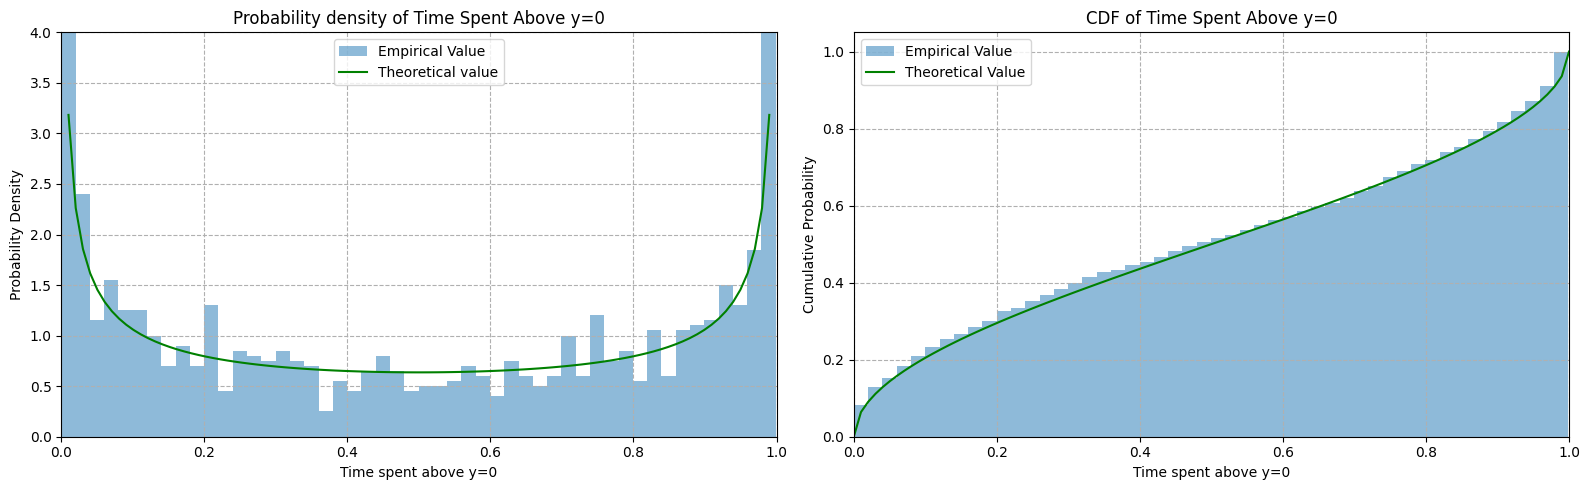

In [59]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))


ax1.hist(above_zero_times, bins=50, density=True, alpha=0.5, label="Empirical Value")
ax1.set_xlabel("Time spent above y=0")
ax1.set_ylabel("Probability Density")
ax1.set_title("Probability density of Time Spent Above y=0")
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 4)
ax1.plot(x, pdf, color="green", label="Theoretical value")
ax1.legend(loc="upper center")
ax1.grid(True, linestyle="--")


ax2.hist(
    above_zero_times,
    bins=50,
    density=True,
    alpha=0.5,
    cumulative=True,
    label="Empirical Value",
)
ax2.plot(x, cdf, color="green", label="Theoretical Value")
ax2.set_xlabel("Time spent above y=0")
ax2.set_ylabel("Cumulative Probability")
ax2.set_title("CDF of Time Spent Above y=0")
ax2.set_xlim(0, 1)
ax2.legend()
ax2.grid(True, linestyle="--")

plt.tight_layout()
plt.show()

Drugie prawo


In [60]:
last_cross_times = last_crossing_time(all_W, t_w)

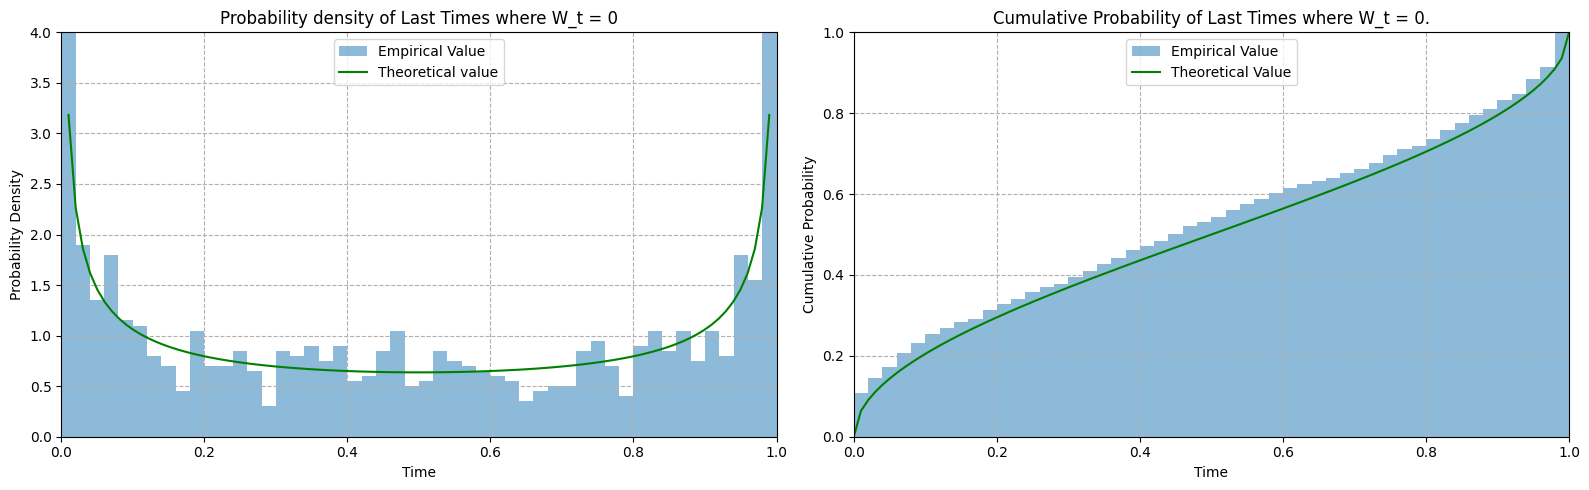

In [61]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

ax1.hist(last_cross_times, bins=50, density=True, alpha=0.5, label="Empirical Value")
ax1.set_xlabel("Time")
ax1.set_ylabel("Probability Density")
ax1.set_title("Probability density of Last Times where W_t = 0")
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 4)
ax1.plot(x, pdf, color="green", label="Theoretical value")
ax1.legend(loc="upper center")
ax1.grid(True, linestyle="--")

ax2.hist(
    last_cross_times,
    bins=50,
    density=True,
    alpha=0.5,
    cumulative=True,
    label="Empirical Value",
)
ax2.plot(x, cdf, color="green", label="Theoretical Value")
ax2.set_xlabel("Time")
ax2.set_ylabel("Cumulative Probability")
ax2.set_title("Cumulative Probability of Last Times where W_t = 0.")
ax2.set_xlim(0, 1)
ax2.set_ylim(0, 1)
ax2.legend(loc="upper center")
ax2.grid(True, linestyle="--")

plt.tight_layout()
plt.show()

Trzecie prawo

In [62]:
max_indices = np.argmax(all_W, axis=1)
max_times = t_w[max_indices]

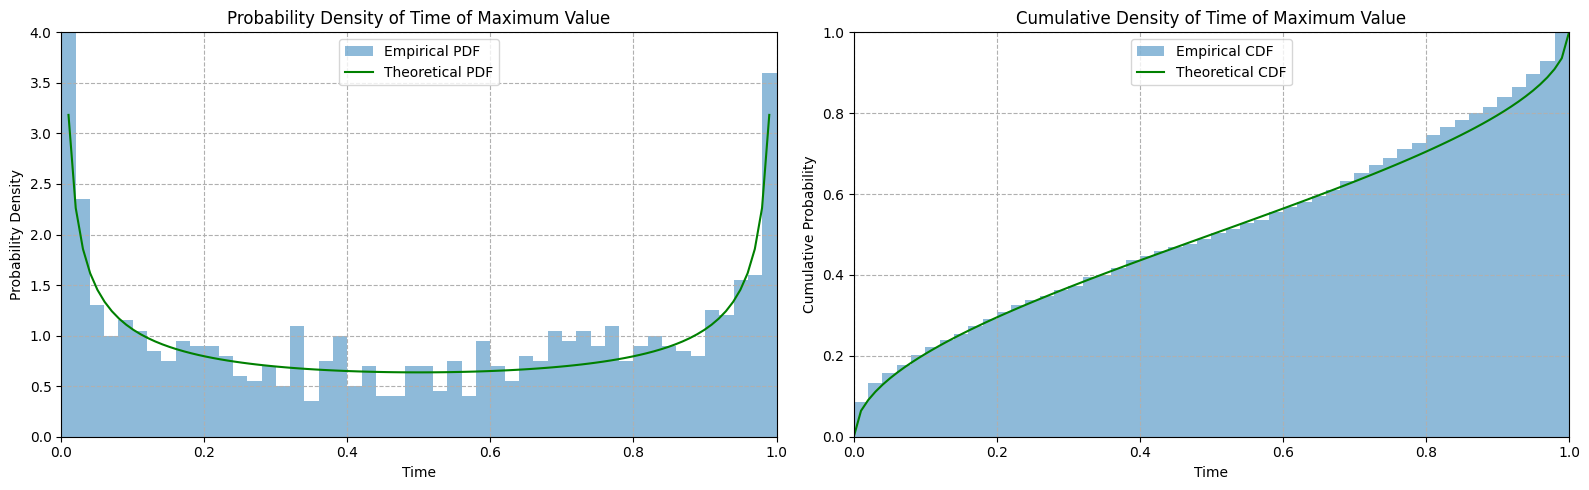

In [63]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

ax1.hist(max_times, bins=50, density=True, alpha=0.5, label="Empirical PDF")
ax1.plot(x, pdf, color="green", label="Theoretical PDF")
ax1.set_xlabel("Time")
ax1.set_ylabel("Probability Density")
ax1.set_title("Probability Density of Time of Maximum Value")
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 4)
ax1.legend(loc="upper center")
ax1.grid(True, linestyle="--")


ax2.hist(
    max_times, bins=50, density=True, alpha=0.5, cumulative=True, label="Empirical CDF"
)
ax2.plot(x, cdf, color="green", label="Theoretical CDF")
ax2.set_xlabel("Time")
ax2.set_ylabel("Cumulative Probability")
ax2.set_title("Cumulative Density of Time of Maximum Value")
ax2.set_xlim(0, 1)
ax2.set_ylim(0, 1)
ax2.legend(loc="upper center")
ax2.grid(True, linestyle="--")

plt.tight_layout()
plt.show()